In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tqdm import tqdm
import statsmodels.api as sm

In [2]:
df = pd.read_csv('AEP_hourly_processed.csv')

In [3]:
df.head()

,Datetime,AEP_MW,Date,Year,Month,Day,Hour,Weekday,Holiday,WorkingHour
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,1,Friday,0,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,1,2,Friday,0,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,1,3,Friday,0,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,1,4,Friday,0,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,1,5,Friday,0,0


In [4]:
df["CMA"] = df["AEP_MW"].expanding().mean()

In [5]:
for i in tqdm(range(len(df.loc[:, "AEP_MW"].values))):
    df.loc[i, "Preds"] = df.loc[(df["Hour"]==df.loc[i, "Hour"]) & (df["Weekday"]==df.loc[i, "Weekday"]) & (df["Holiday"]==df.loc[i, "Holiday"]) & (df["WorkingHour"]==df.loc[i, "WorkingHour"]) & (df["Month"]==df.loc[i, "Month"]), "AEP_MW"].mean()

100%|██████████████████████████████████████████████████████████████████████████| 121273/121273 [49:07<00:00, 41.15it/s]


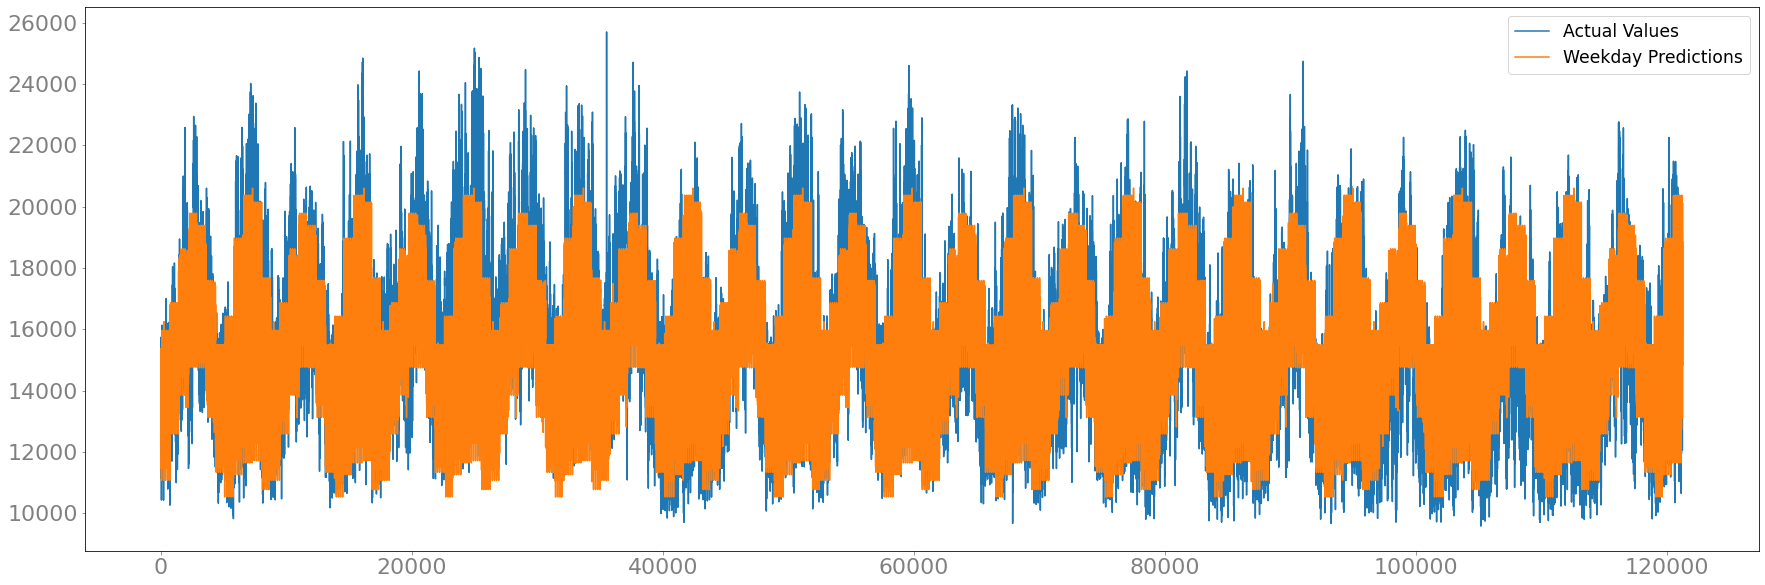

In [15]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(0, len(df["Datetime"])), df["AEP_MW"], label='Actual Values')
ax.plot(np.arange(0, len(df["Datetime"])), df["Preds"], label='Weekday Predictions')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

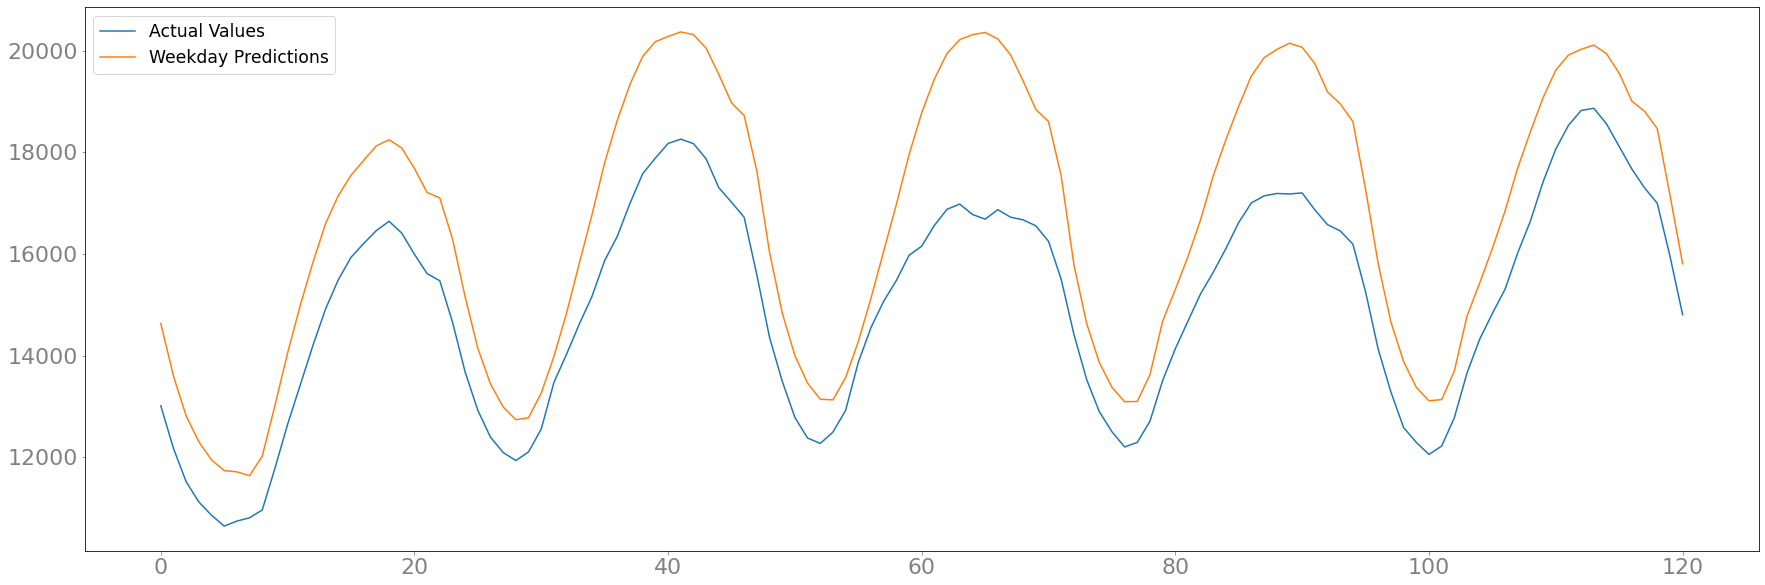

In [7]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(df.loc[len(df["AEP_MW"])-121:, "AEP_MW"].values, label='Actual Values')
ax.plot(df.loc[len(df["Preds"])-121:, "Preds"].values, label='Weekday Predictions')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

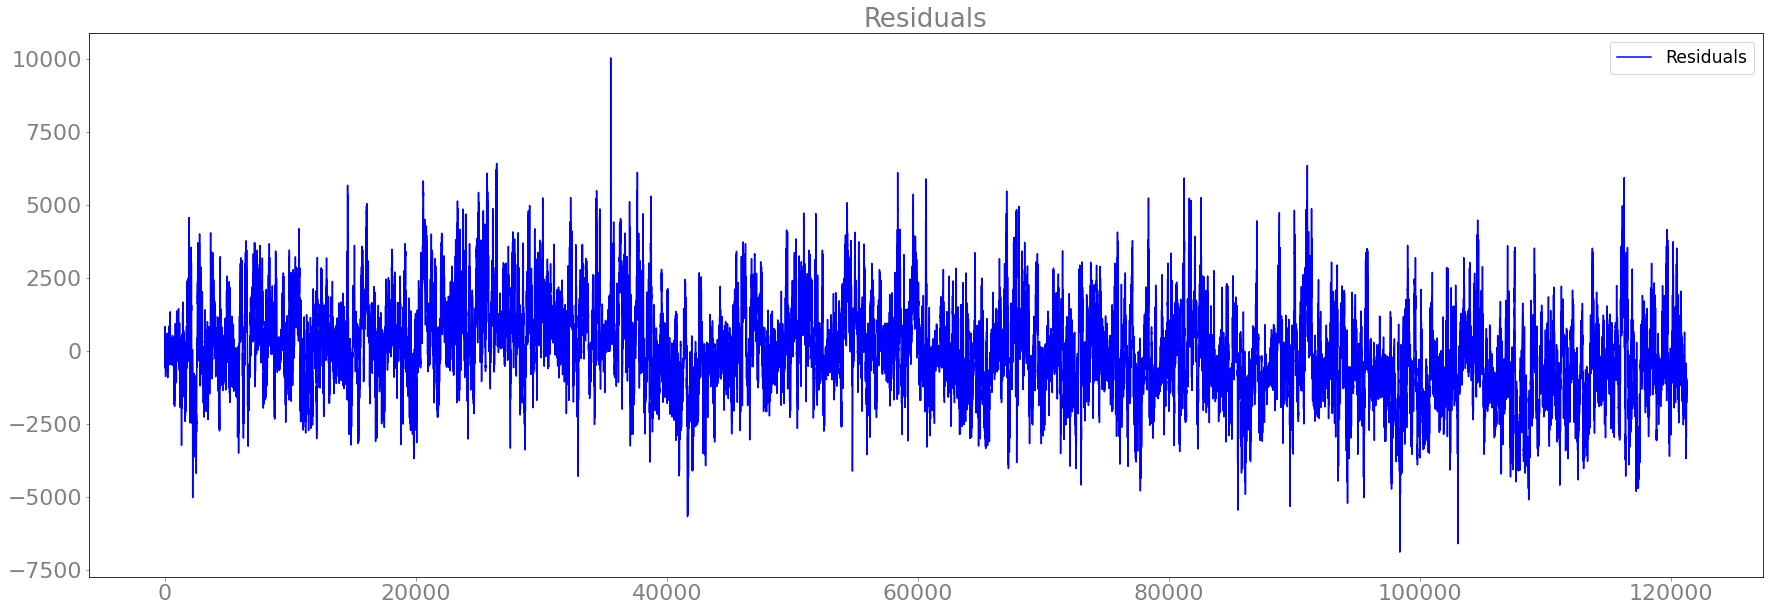

In [8]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(0, len(df["Datetime"])), df.loc[:, "AEP_MW"] - df.loc[:, "Preds"], c='blue', label='Residuals')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.set_title("Residuals", c='grey', size=26)
ax.legend(fontsize='xx-large')
plt.show()

In [9]:
(df.loc[:, "AEP_MW"] - df.loc[:, "Preds"]).mean()

4.9917102199175496e-14

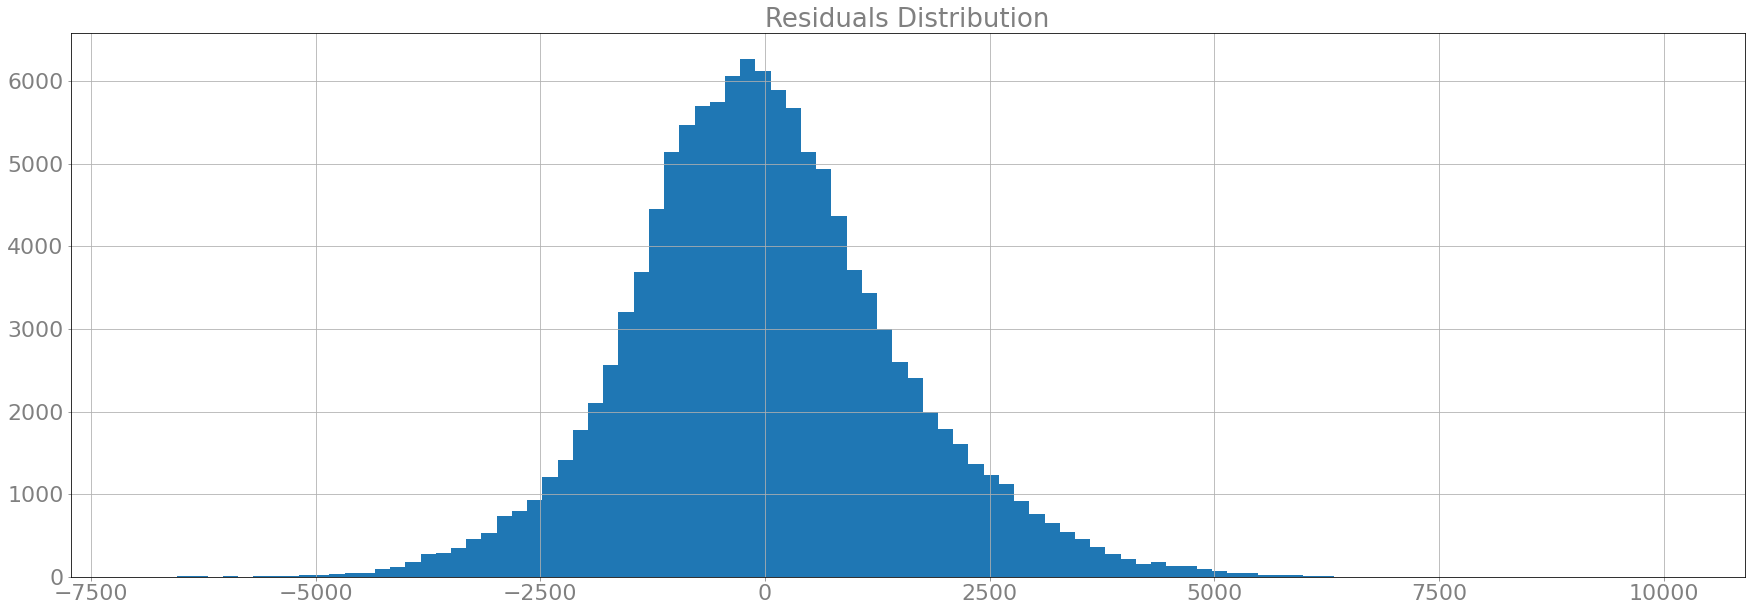

In [10]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
(df.loc[:, "AEP_MW"] - df.loc[:, "Preds"]).hist(bins=100)
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.set_title("Residuals Distribution", c='grey', size=26)
plt.show()

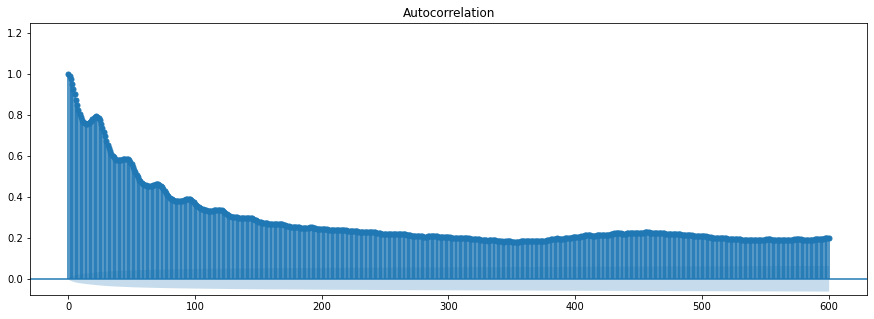

In [11]:
plt.rc("figure", figsize=(15,5))
dta = df.loc[:, "AEP_MW"] - df.loc[:, "Preds"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=600, auto_ylims=True)
plt.show()

c:\program files\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


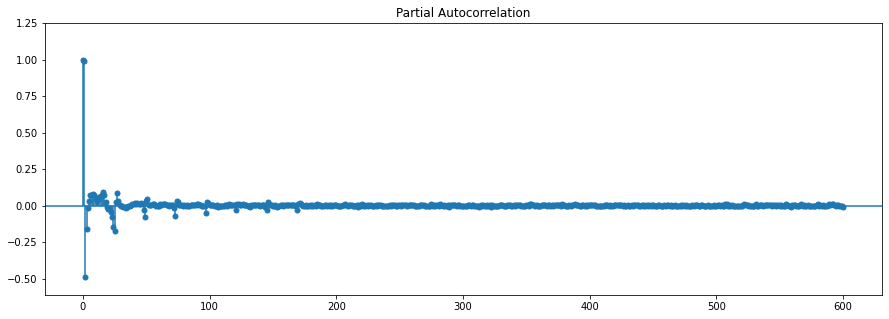

In [12]:
plt.rc("figure", figsize=(15,5))
dta = df.loc[:, "AEP_MW"] - df.loc[:, "Preds"]
sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=600, auto_ylims=True)
plt.show()

In [13]:
rmse = mean_squared_error(df.loc[:, "AEP_MW"].values, df.loc[:, "Preds"].values)**0.5
print("Test RMSE: %.3f" % rmse)

Test RMSE: 1488.633
